# Business Understanding

## Introduction
Traffic accidents are a critical public safety issue, causing injuries, fatalities and significant economic losses. Stakeholders such as traffic authorities and emergency services often face challenges in predicting and mitigating injury severity in crashes. Understanding the factors influencing injury outcomes can inform better policies, resource allocation and public safety to reduce injury severity and save lives.

## Use Cases
- Use the model to identify high-risk conditions (eg. weather, lighting, etc.) and implement measures like improved signage, speed limits or road design to reduce injury severity in traffic accidents.
- Predict the severity of injuries based on crash conditions, enabling emergency services to prioritize resources and respond more effectively to severe accidents. 

## Value Proposition
This project aims to develop a classification model that predicts injury severity in traffic crashes. By identifying key high-risk contributing to severe injuries, stakeholders can implement proactive measures to:
    - Reduce injury severity in traffic accidents through ad-hoc interventions
    - Enhance decision-making and resource allocation for emergency services
    - Improve public safety and save lives

# Business Objective
- The task is to predict the severity of injuries based on the given features:
    - Environment: The environment in which the accident occurred.
        - POSTED_SPEED_LIMIT: The posted speed limit.
        - WEAHTER_CONDITION: The weather condition.
        - LIGHTING_CONDITION: The lighting condition.
        - ROADWAY_SURFACE_COND: The roadway surface condition.
        - ROAD_DEFECT: Whether or not the road was defective.
        - TRAFFICWAY_TYPE: The type of trafficway.
        - TRAFFIC_CONTROL_DEVICE: The traffic control device present at the location of the accident.
    - Crash Dynamics: The dynamics of the crash.
        - FIRST_CRASH_TYPE: The type of the first crash.
        - TRAFFICWAY_TYPE: The type of trafficway.
        - ALIGNMENT: The alignment of the road.
        - LANE_CNT: The number of through lanes in either direction.
        - CRASH_HOUR: The hour of the crash.
        - CRASH_DAY_OF_WEEK: The day of the week of the crash.
        - CRASH_MONTH: The month of the crash.
    - Human Factors:
        - PRIM_CONTRIBUTORY_CAUSE: The primary contributory cause of the accident.
        - SEC_CONTRIBUTORY_CAUSE: The secondary contributory cause of the accident.
        - HIT_AND_RUN_I: Whether or not the crash involved a hit and run.
        - NOT_RIGHT_OF_WAY_I: Whether or not the crash involved a violation of the right of way.
        - WORK_ZONE_I: Whether or not the crash occurred in a work zone.
    - Location Factors:
        - LATITUDE: The latitude of the location of the crash.
        - LONGITUDE: The longitude of the location of the crash.
        - BEAT_OF_OCCURRENCE: The police beat of occurrence.
    - Target:
        - MOST_SEVERE_INJURY: Multi-class classification target (eg. FATAL, INCAPACITATING INJURY, NONINCAPACITATING INJURY, REPORTED, NO INJURY).


# Data Understanding

## Introduction
The dataset contains information about traffic accidents in Chicago. Stakeholders need reliable data-driven insights to mitigate injury severity and optimize their strategies. The dataset in this project is directly related to the task of predicting injury severity in traffic accidents.

## Data Description
- The dataset includes detailed records of traffic accidents covering various features such as environment, crash dynamics, human factors, location factors and target variable MOST_SEVERE_INJURY.

## Data Quality
- The dataset is very large with over 400,000 records and 49 features, providing a rich source of information for analysis.
- The dataset comes from the City of Chicago's [open data portal](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if) and is updated daily making it a reliable source of information for stakeholders.

## Data Relevance
- Use data on crash conditions (eg. weather) to identify high-risk conditions take proative measures.
- Predict injury severity to prioritize emergency services and allocate resources more effectively. 

## Conclusion
The dataset is robust, relevant and continually updated, making it an indispensable resource for the task of predicting injury severity in traffic accidents. 

# Data Preparation

## Assembly
- The source data is comprised of three CSV files:
    - [Crash Data](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data)
    - [Driver/Passenger Data](https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d/about_data)
    - [Vehicles Data](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3/about_data)
- The data will be assembled into a single dataset by joining the three tables on the common key CRASH_RECORD_ID.

## Cleaning
- Irrelevant columns that do not contribute to the task will be dropped.
- Missing values that will be imputed or dropped.

## Transformation
- Categorical features will be encoded using one-hot encoding.
- Numerical features will be scaled using standard scaling.

## Splitting
- The dataset will be split into training and testing sets using a standard 80/20 split.
- These sets will be saved to disk for future use as:
    - [X_train](./data/X_train.csv)
    - [X_test](./data/X_test.csv)
    - [y_train](./data/y_train.csv)
    - [y_test](./data/y_test.csv)

# Modeling

## Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.sparse import hstack
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

/var/folders/zp/h7t69w7n1jvg_7vxjttlw77c0000gn/T/ipykernel_27071/2624536287.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Load Data

In [2]:
# load data
data = pd.read_csv('./data/Traffic_Crashes_-_Crashes_20250122.csv')
data_vehicles = pd.read_csv('./data/Traffic_Crashes_-_Vehicles_20250122.csv')
data_people = pd.read_csv('./data/Traffic_Crashes_-_People_20250122.csv')

/var/folders/zp/h7t69w7n1jvg_7vxjttlw77c0000gn/T/ipykernel_27071/710280419.py:3: DtypeWarning: Columns (18,20,22,23,39,40,41,42,43,47,48,49,50,51,52,53,54,55,56,57,58,59,60,68,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  data_vehicles = pd.read_csv('./data/Traffic_Crashes_-_Vehicles_20250122.csv')
/var/folders/zp/h7t69w7n1jvg_7vxjttlw77c0000gn/T/ipykernel_27071/710280419.py:4: DtypeWarning: Columns (19,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data_people = pd.read_csv('./data/Traffic_Crashes_-_People_20250122.csv')


In [3]:
# merge data
data = data.merge(data_vehicles, on='CRASH_RECORD_ID')
data = data.merge(data_people, on='CRASH_RECORD_ID')

## Data Preprocessing
- Handle missing values using imputation or dropping.
- Drop columns with a high rate (> 50%) missing values.

In [4]:
# calculate null percentages
null_percentage = data.isnull().mean() * 100

# drop columns with more than 50% missing values
columns_to_drop = null_percentage[null_percentage > 50].index
data = data.drop(columns=columns_to_drop)

### Imputing Missing Values
- Numerical features missing values will be imputed using the median.
- Categorical features missing values will be imputed using the mode.

In [5]:
# fill categorical columns with mode
for column in data.select_dtypes(include='object').columns:
    mode_value = data[column].mode()[0]
    data[column] = data[column].fillna(mode_value)

# fill numerical columns with median
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    median_value = data[column].median()
    data[column] = data[column].fillna(median_value)

## Feature Analysis & Selection
- Separate features and target variable.
- Perform feature analysis to identify important features.
- Select features based on importance scores.

In [6]:
# separate features and target
X = data.drop(columns='MOST_SEVERE_INJURY')
y = data['MOST_SEVERE_INJURY']

## Feature Engineering & Outlier Removal
- Group features values with low frequency into a single category.

In [7]:
# # replace low frequency categories with 'OTHER'
# def group_rare_categories(data, col, threshold=2000):
#     freq = data[col].value_counts()
#     rare_labels = freq[freq < threshold].index
#     return data[col].apply(lambda x: 'OTHER' if x in rare_labels else x)
# 
# # Apply grouping to all categorical features
# for feature in data.select_dtypes(include='object').columns:
#     data[feature] = group_rare_categories(data, feature, threshold=200)
# 

### Feature Selection for Categorical Features
- Encode categorical features using one-hot encoding.
- Encode target variable using label encoding.
- Perform feature selection using chi-squared test.
- Drop features outside p-value threshold.

In [8]:
# select categorical columns
categorical = data.select_dtypes(include='object').columns

In [9]:
# save categorical to csv
categorical_columns_df = pd.DataFrame(categorical, columns=['Categorical_Columns'])
categorical_columns_df.to_csv('./data/categorical_columns.csv', index=False)

In [10]:
categorical_drop = [

    # IDs
    'CRASH_RECORD_ID',
    'PERSON_ID', 
    'USDOT_NO', 
    'CCMC_NO', 
    'ILCC_NO', 
    'UN_NO', 
    'EMS_RUN_NO', 
    'IDOT_PERMIT_NO',

    # Dates
    'DATE_POLICE_NOTIFIED',
    'CRASH_DATE_EST_I',
    'CRASH_DATE_x',
    'CRASH_DATE_x',
    'CRASH_DATE_y',
    'DATE_ACCIDENT',
    'DATE_POLICE_NOTIFIED',
    'CRASH_DATE_EST_I',

    # Geographic
    'CITY',
    'STATE',
    'ZIPCODE',
    'LATITUDE',
    'LONGITUDE',
    'LOCATION', 
    'STREET_NAME',
    'STREET_DIRECTION',
    'CARRIER_STATE', 
    'CARRIER_CITY',

    # # Misc.
    'TOWED_BY',
    'TOWED_TO',
    'AREA_00_I',
    'AREA_01_I',
    'AREA_02_I',
    'AREA_03_I',
    'AREA_04_I',
    'AREA_05_I',
    'AREA_06_I',
    'AREA_07_I',
    'AREA_08_I',
    'AREA_09_I',
    'AREA_10_I',
    'AREA_11_I',
    'AREA_12_I',
    'AREA_99_I',
    'WORK_ZONE_TYPE',

    # 'PHOTOS_TAKEN_I', 
    'STATEMENTS_TAKEN_I', 
    'DOORING_I',
    'WIDE_LOAD_I',

    # # Vehicle
    'VEHICLE_ID',
    'MAKE',
    'MODEL',
    'LIC_PLATE_STATE',
    'TRAILER1_WIDTH', 
    'TRAILER2_WIDTH',
    
    # # hazzardous materials
    'HAZMAT_PLACARDS_I', 
    'HAZMAT_NAME', 
    'HAZMAT_PRESENT_I', 
    'HAZMAT_REPORT_I', 
    'HAZMAT_REPORT_NO', 
    'HAZMAT_VIO_CAUSE_CRASH_I', 
    'HAZMAT_OUT_OF_SERVICE_I'

    # # commercial vehicle
    'COMMERCIAL_SRC', 
    'CARGO_BODY_TYPE', 
    'VEHICLE_CONFIG', 
    'GVWR', 
    'CARRIER_NAME', 
    'MCS_VIO_CAUSE_CRASH_I', 
    'MCS_REPORT_I', 
    'MCS_REPORT_NO', 
    'MCS_OUT_OF_SERVICE_I',
]


In [11]:
data = data.drop(columns=categorical_drop, errors='ignore')

In [12]:
# select filtered categorical columns and save to csv
categorical = data.select_dtypes(include='object').columns
categorical_columns_df = pd.DataFrame(categorical, columns=['Categorical_Columns'])
categorical_columns_df.to_csv('./checkpoint/filtered_categorical_columns.csv', index=False)

### Encode Features
- One hot encoding with dense matricies is too memory intensive.
- Use a combination of frequency encoding and one-hot encoding with sparse matricies.

In [13]:
def limit_categories(column, threshold=100):
    """group rare categories into 'OTHER'."""
    freq = column.value_counts()
    rare_categories = freq[freq < threshold].index
    return column.apply(lambda x: 'OTHER' if x in rare_categories else x)

In [14]:
# separate categorical columns by cardinality
low_cardinality_cols = [col for col in data.select_dtypes(include='object').columns if data[col].nunique() <= 50]
high_cardinality_cols = [col for col in data.select_dtypes(include='object').columns if data[col].nunique() > 50]

In [15]:
# one-hot encode low-cardinality columns
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_low_cardinality = onehot_encoder.fit_transform(data[low_cardinality_cols])

In [16]:
# get feature names for low-cardinality columns
encoded_low_cardinality_feature_names = onehot_encoder.get_feature_names_out(low_cardinality_cols)

In [17]:
# frequency encode high-cardinality columns
for col in high_cardinality_cols:
    freq_map = data[col].value_counts(normalize=True)
    data[col] = data[col].map(freq_map)

In [18]:
# combine encoded low-cardinality data and frequency-encoded high-cardinality data
# convert high-cardinality columns back to a DataFrame for alignment
frequency_encoded_high_cardinality = data[high_cardinality_cols].to_numpy()
combined_encoded_data = np.hstack([encoded_low_cardinality, frequency_encoded_high_cardinality])

In [19]:
# generate feature names for combined data
combined_feature_names = np.concatenate([encoded_low_cardinality_feature_names, high_cardinality_cols])

# perform Chi-Square test
label_encoder = LabelEncoder()
chi_scores, p_values = chi2(combined_encoded_data, label_encoder.fit_transform(data['MOST_SEVERE_INJURY']))

# create a DataFrame for the Chi-Square results
chi2_results = pd.DataFrame({
    'Feature': combined_feature_names,
    'Chi2 Score': chi_scores,
    'P-Value': p_values
})

# select relevant features with p-value < 0.05
# selected_categorical_features = chi2_results[chi2_results['P-Value'] < 0.05]['Feature'].values

In [20]:
# save the results to a CSV file
chi2_results.to_csv('./checkpoint/chi2_results.csv', index=False)

In [21]:
# threshold for p-value
p_value_threshold = 0.05

# filter out insignificant features
insignificant_features = chi2_results[chi2_results['P-Value'] >= p_value_threshold]['Feature']

# filter out low chi-square score features if needed
low_chi2_threshold = 10
low_chi2_features = chi2_results[chi2_results['Chi2 Score'] < low_chi2_threshold]['Feature']

# combine features to drop
features_to_drop = set(insignificant_features).union(set(low_chi2_features))

# print features to drop
print(f"Features to remove ({len(features_to_drop)}): {features_to_drop}")

# Drop these features from your dataset
data = data.drop(columns=features_to_drop, errors='ignore')


Features to remove (15): {'CRASH_DATE', 'VEHICLE_TYPE_SNOWMOBILE', 'VEHICLE_DEFECT_CARGO', 'MANEUVER_DIVERGING', 'SAFETY_EQUIPMENT_SHOULD/LAP BELT USED IMPROPERLY', 'VEHICLE_DEFECT_SIGNALS', 'VEHICLE_USE_CAMPER/RV - SINGLE UNIT', 'UNIT_TYPE_EQUESTRIAN', 'VEHICLE_USE_HOUSE TRAILER', 'VEHICLE_DEFECT_ENGINE/MOTOR', 'VEHICLE_TYPE_FARM EQUIPMENT', 'DEVICE_CONDITION_WORN REFLECTIVE MATERIAL', 'VEHICLE_DEFECT_RESTRAINT SYSTEM', 'DRIVER_VISION_BLOWING MATERIALS', 'VEHICLE_DEFECT_TRAILER COUPLING'}


In [22]:
# save selected features to csv
final_categorical = data.select_dtypes(include='object').columns
selected_categorical_features_df = pd.DataFrame(final_categorical, columns=['Selected_Categorical_Features'])
selected_categorical_features_df.to_csv('./checkpoint/final_categorical_features.csv', index=False)

### Feature Selection for Numerical Features
- Perform feature selection using ANOVA test.
- Drop features outside p-value threshold.

In [23]:
# identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

In [24]:
# save numerical columns to csv
numerical_columns_df = pd.DataFrame(numerical_columns, columns=['Numerical_Columns'])
numerical_columns_df.to_csv('./checkpoint/numerical_columns.csv', index=False)

In [25]:
# collect numerical columns to drop
numerical_drop = [
    'STREET_NO',
    'BEAT_OF_OCCURRENCE',
    'CRASH_UNIT_ID',
    'UNIT_NO',
    'VEHICLE_ID_x',
    'VEHICLE_ID_y'
]

In [26]:
# drop numerical columns
data = data.drop(columns=numerical_drop, errors='ignore')

In [27]:
# perform ANOVA test
f_scores, p_values = f_classif(data.select_dtypes(include=['float64', 'int64']), label_encoder.fit_transform(data['MOST_SEVERE_INJURY']))

# create a DataFrame for ANOVA results
anova_results = pd.DataFrame({
    'Feature': data.select_dtypes(include=['float64', 'int64']).columns,
    'F-Value': f_scores,
    'P-Value': p_values
})

# filter significant features (p-value < 0.05)
significant_features = anova_results[anova_results['P-Value'] < 0.05]

/Users/rob/micromamba/envs/learn-env/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/rob/micromamba/envs/learn-env/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [28]:
# filter the dataset to keep only significant numerical features
#numerical = data[significant_features['Feature'].values]
data = data[significant_features['Feature'].values]

## Correlation Analysis & Variance Inflation Factor
- Check for correlation between features and target variable.
- Drop features with low correlation with the target variable.
- Drop features with high correlation with other features (r > 0.9).
- Check for multicollinearity using the variance inflation factor (VIF).

In [29]:
# def calculate_vif(data, features):
#     vif_data = pd.DataFrame()
#     vif_data["Feature"] = features
#     vif_data["VIF"] = [variance_inflation_factor(data[features].values, i) for i in range(len(features))]
#     return vif_data
# 
# def reduce_multicollinearity(data, features, threshold=10.0):
#     """
#     Iteratively removes features with high VIF.
# 
#     Parameters:
#         data (DataFrame): Data containing features.
#         features (list): List of numerical features to assess.
#         threshold (float): VIF threshold to determine high multicollinearity.
# 
#     Returns:
#         list: Features with VIF below the threshold.
#     """
#     while True:
#         vif_data = calculate_vif(data, features)
#         max_vif = vif_data['VIF'].max()
#         if max_vif > threshold:
#             # Remove the feature with the highest VIF
#             feature_to_remove = vif_data.loc[vif_data['VIF'].idxmax(), 'Feature']
#             features.remove(feature_to_remove)
#             print(f"Removed '{feature_to_remove}' with VIF={max_vif:.2f}")
#         else:
#             break
#     return features
# 
# reduced_features = reduce_multicollinearity(data_encoded, encoded_feature_names, threshold=10.0)
# print(f"Reduced features: {reduced_features}")

# Model

### Encode Target Variable

In [30]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

### Assign Feature List

In [31]:
X = data

### Test-Train Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)

### Model Pipeline
- Use a StandardScaler to scale the numerical features.
- Use SMOTE to handle class imbalance.
- Use Logistic Regression as the classification model.
- Fit the model on the training set.

In [ ]:
# Split data first
from sklearn.compose import ColumnTransformer

# identify numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# setup preprocessing steps
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# define the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    # ('smote', SMOTE(random_state=42)),  
    ('model', LogisticRegression(
        random_state=42,
        max_iter=800,
        class_weight='balanced',
        penalty='l2',
        C=0.0001
    ))
])

# fit only on training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['POSTED_SPEED_LIMIT', 'NUM_UNITS', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'VEHICLE_YEAR', 'OCCUPANT_CNT',
       'AGE', 'DRIVERS_LICENSE_STATE'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 LogisticRegression(C=0.0001, class_weight='balanced',
                                    max_iter=800, random_state=42))])

In [39]:
y_pred = pipeline.predict(X_test)
# for roc-auc score
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

### Confusion Matrix

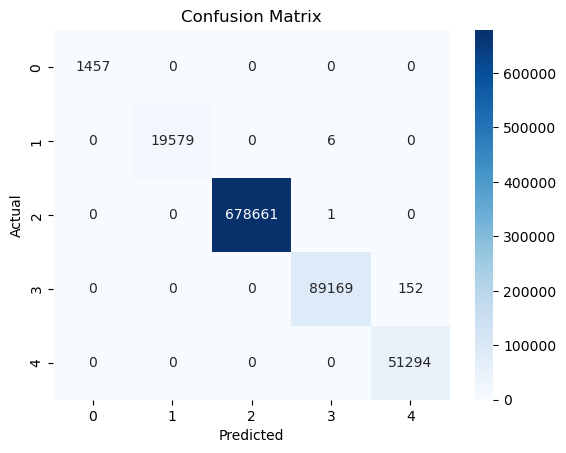

In [40]:
# create and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [41]:
# create and display the classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

                          precision    recall  f1-score   support

                   FATAL       1.00      1.00      1.00      1457
   INCAPACITATING INJURY       1.00      1.00      1.00     19585
 NO INDICATION OF INJURY       1.00      1.00      1.00    678662
NONINCAPACITATING INJURY       1.00      1.00      1.00     89321
   REPORTED, NOT EVIDENT       1.00      1.00      1.00     51294

                accuracy                           1.00    840319
               macro avg       1.00      1.00      1.00    840319
            weighted avg       1.00      1.00      1.00    840319



### Cross-Validation

In [ ]:
# cross validate the model
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validated scores: {cross_val_scores}')

cross_val_scores

In [77]:
cross_val_scores

array([0.99424177, 0.99383567, 0.99370626, 0.99452142, 0.99290745])